In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. a ipython magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
gs = web.DataReader(
    "GS", data_source='yahoo', start='2006-01-01', end='2010-01-01')
gs.head().round(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.70,129.44,124.23,128.87,112.34,6188700
2006-01-04,127.35,128.91,126.38,127.09,110.79,4861600
2006-01-05,126.00,127.32,125.61,127.04,110.74,3717400
2006-01-06,127.29,129.25,127.29,128.84,112.31,4319600
2006-01-09,128.50,130.62,128.00,130.39,113.66,4723500


In [4]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

In [7]:
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


In [8]:
gs.loc['2006'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.699997,129.440002,124.230003,128.869995,112.337547,6188700
2006-01-04,127.349998,128.910004,126.379997,127.089996,110.785889,4861600
2006-01-05,126.000000,127.320000,125.610001,127.040001,110.742340,3717400
2006-01-06,127.290001,129.250000,127.290001,128.839996,112.311401,4319600
2006-01-09,128.500000,130.619995,128.000000,130.389999,113.662605,4723500


In [9]:
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
gs.resample("5D").mean().head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,126.834999,128.730002,125.877501,127.959997,111.544294,4.771825e+06
2006-01-08,130.349998,132.645000,130.205002,131.660000,114.769649,4.664300e+06
2006-01-13,131.510002,133.395005,131.244995,132.924995,115.872357,3.258250e+06
2006-01-18,132.210002,133.853333,131.656667,132.543335,115.611125,4.997767e+06
2006-01-23,133.771997,136.083997,133.310001,135.153998,118.035918,3.968500e+06


In [10]:
gs.resample("W").agg(['mean', 'sum']).head()

Open                    High                     Low  \
                  mean         sum        mean         sum        mean   
Date                                                                     
2006-01-08  126.834999  507.339996  128.730002  514.920006  125.877501   
2006-01-15  130.684000  653.419998  132.848001  664.240006  130.544000   
2006-01-22  131.907501  527.630005  133.672501  534.690003  131.389999   
2006-01-29  133.771997  668.859986  136.083997  680.419983  133.310001   
2006-02-05  140.900000  704.500000  142.467999  712.339996  139.937998   

                             Close               Adj Close              \
                   sum        mean         sum        mean         sum   
Date                                                                     
2006-01-08  503.510002  127.959997  511.839988  111.544294  446.177177   
2006-01-15  652.720001  131.979999  659.899994  115.048592  575.242958   
2006-01-22  525.559998  132.555000  530.220000  115.603432  462.413728   
2006-01-29  666.550003  135.153998  675.769989  118.035918  590.179588   
2006-02-05  699.689988  141.618002  708.090011  123.681204  618.406020   

               Volume            
                 mean       sum  
Date                             
2006-01-08  4771825.0  19087300  
2006-01-15  4310420.0  21552100  
2006-01-22  4653725.0  18614900  
2006-01-29  3968500.0  19842500  
2006-02-05  3920120.0  19600600

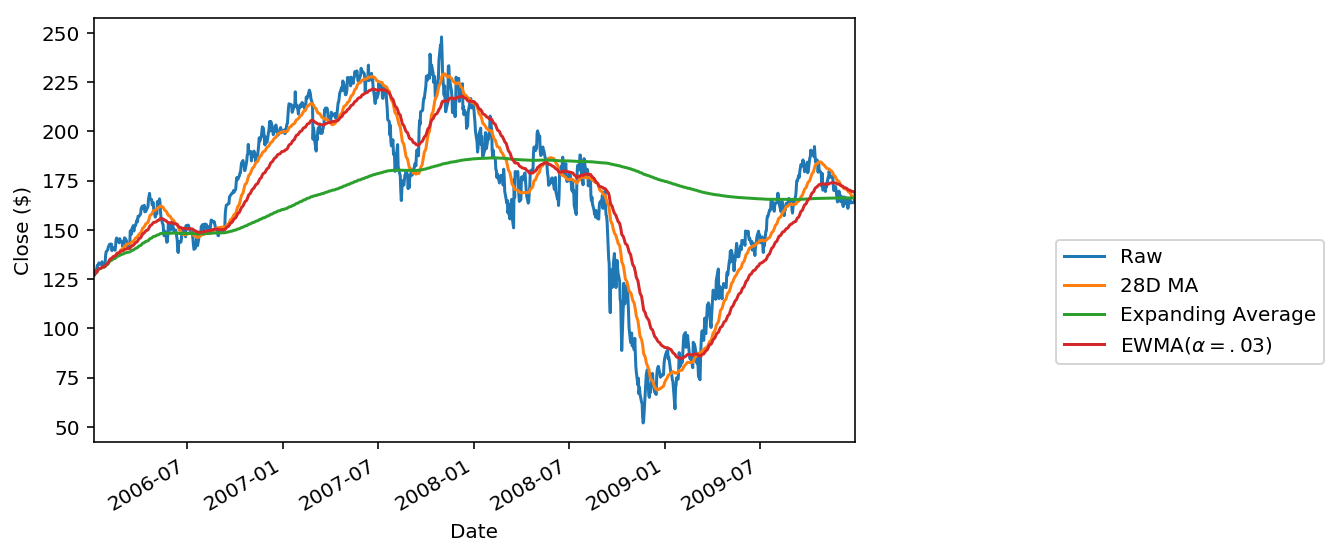

In [13]:
# https://www.tutorialspoint.com/python_pandas/python_pandas_window_functions.htm
col = 'Close'
gs[col].plot(label='Raw')
gs[col].rolling(28).mean().plot(label='28D MA')
gs[col].expanding().mean().plot(label='Expanding Average')
gs[col].ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
plt.show()

In [2]:
import os
import io
import glob
import zipfile
from utils import download_timeseries

import statsmodels.api as sm


def download_many(start, end):
    months = pd.period_range(start, end=end, freq='M')
    # We could easily parallelize this loop.
    for i, month in enumerate(months):
        download_timeseries(month)


def time_to_datetime(df, columns):
    '''
    Combine all time items into datetimes.

    2014-01-01,1149.0 -> 2014-01-01T11:49:00
    '''
    def converter(col):
        timepart = (col.astype(str)
                       .str.replace('\.0$', '')  # NaNs force float dtype
                       .str.pad(4, fillchar='0'))
        return  pd.to_datetime(df['fl_date'] + ' ' +
                               timepart.str.slice(0, 2) + ':' +
                               timepart.str.slice(2, 4),
                               errors='coerce')
        return datetime_part
    df[columns] = df[columns].apply(converter)
    return df


def read_one(fp):
    df = (pd.read_csv(fp, encoding='latin1')
            .rename(columns=str.lower)
            .drop('unnamed: 6', axis=1)
            .pipe(time_to_datetime, ['dep_time', 'arr_time', 'crs_arr_time',
                                     'crs_dep_time'])
            .assign(fl_date=lambda x: pd.to_datetime(x['fl_date'])))
    return df

/Users/ethen/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
store = 'data/ts.hdf5'

if not os.path.exists(store):
    download_many('2000-01-01', '2016-01-01')

    zips = glob.glob(os.path.join('data', 'timeseries', '*.zip'))
    csvs = [unzip_one(fp) for fp in zips]
    dfs = [read_one(fp) for fp in csvs]
    df = pd.concat(dfs, ignore_index=True)

    df['origin'] = df['origin'].astype('category')
    df.to_hdf(store, 'ts', format='table')
else:
    df = pd.read_hdf(store, 'ts')

In [3]:
store = 'data/ts.hdf5'

if not os.path.exists(store):
    download_many('2000-01-01', '2016-01-01')

    # zips = glob.glob(os.path.join('data', 'timeseries', '*.zip'))
    dfs = [read_one(fp) for fp in csvs]
    df = pd.concat(dfs, ignore_index=True)

    df['origin'] = df['origin'].astype('category')
    df.to_hdf(store, 'ts', format='table')
else:
    df = pd.read_hdf(store, 'ts')

NameError: name 'csvs' is not defined

In [ ]:
import requests
import calendar

start = '2000-01-01'
end = '2016-01-01'
months = pd.period_range(start, end=end, freq='M')
month = months[0]
download_timeseries(month)

In [20]:
def download_timeseries(date):
    month_name = calendar.month_name[date.month]
    year = date.year
    month = date.month
    data = [
        ('UserTableName', 'On_Time_Performance'),
        ('DBShortName', 'On_Time'),
        ('RawDataTable', 'T_ONTIME'),
        ('sqlstr', ' SELECT FL_DATE,ORIGIN,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME FROM  T_ONTIME WHERE Month ={} AND YEAR={}'.format(month, year)),
        ('varlist', 'FL_DATE,ORIGIN,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME'),
        ('filter1', 'title='),
        ('filter2', 'title='),
        ('geo', 'All'),
        ('time',month_name),
        ('timename', 'Month'),
        ('GEOGRAPHY', 'All'),
        ('XYEAR', str(year)),
        ('FREQUENCY', '1'),
        ('VarDesc', 'Year'),
        ('VarType', 'Num'),
        ('VarDesc', 'Quarter'),
        ('VarType', 'Num'),
        ('VarDesc', 'Month'),
        ('VarType', 'Num'),
        ('VarDesc', 'DayofMonth'),
        ('VarType', 'Num'),
        ('VarDesc', 'DayOfWeek'),
        ('VarType', 'Num'),
        ('VarName', 'FL_DATE'),
        ('VarDesc', 'FlightDate'),
        ('VarType', 'Char'),
        ('VarDesc', 'UniqueCarrier'),
        ('VarType', 'Char'),
        ('VarDesc', 'AirlineID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Carrier'),
        ('VarType', 'Char'),
        ('VarDesc', 'TailNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'FlightNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginAirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'OriginAirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'OriginCityMarketID'),
        ('VarType', 'Num'),
        ('VarName', 'ORIGIN'),
        ('VarDesc', 'Origin'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginCityName'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginState'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginStateFips'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginStateName'),
        ('VarType', 'Char'),
        ('VarDesc', 'OriginWac'),
        ('VarType', 'Num'),
        ('VarDesc', 'DestAirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'DestAirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'DestCityMarketID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Dest'),
        ('VarType', 'Char'),
        ('VarDesc', 'DestCityName'),
        ('VarType', 'Char'),
        ('VarDesc', 'DestState'),
        ('VarType', 'Char'),
        ('VarDesc', 'DestStateFips'),
        ('VarType', 'Char'),
        ('VarDesc', 'DestStateName'),
        ('VarType', 'Char'),
        ('VarDesc', 'DestWac'),
        ('VarType', 'Num'),
        ('VarName', 'CRS_DEP_TIME'),
        ('VarDesc', 'CRSDepTime'),
        ('VarType', 'Char'),
        ('VarName', 'DEP_TIME'),
        ('VarDesc', 'DepTime'),
        ('VarType', 'Char'),
        ('VarDesc', 'DepDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'DepDelayMinutes'),
        ('VarType', 'Num'),
        ('VarDesc', 'DepDel15'),
        ('VarType', 'Num'),
        ('VarDesc', 'DepartureDelayGroups'),
        ('VarType', 'Num'),
        ('VarDesc', 'DepTimeBlk'),
        ('VarType', 'Char'),
        ('VarDesc', 'TaxiOut'),
        ('VarType', 'Num'),
        ('VarDesc', 'WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'TaxiIn'),
        ('VarType', 'Num'),
        ('VarName', 'CRS_ARR_TIME'),
        ('VarDesc', 'CRSArrTime'),
        ('VarType', 'Char'),
        ('VarName', 'ARR_TIME'),
        ('VarDesc', 'ArrTime'),
        ('VarType', 'Char'),
        ('VarDesc', 'ArrDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'ArrDelayMinutes'),
        ('VarType', 'Num'),
        ('VarDesc', 'ArrDel15'),
        ('VarType', 'Num'),
        ('VarDesc', 'ArrivalDelayGroups'),
        ('VarType', 'Num'),
        ('VarDesc', 'ArrTimeBlk'),
        ('VarType', 'Char'),
        ('VarDesc', 'Cancelled'),
        ('VarType', 'Num'),
        ('VarDesc', 'CancellationCode'),
        ('VarType', 'Char'),
        ('VarDesc', 'Diverted'),
        ('VarType', 'Num'),
        ('VarDesc', 'CRSElapsedTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'ActualElapsedTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'AirTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Flights'),
        ('VarType', 'Num'),
        ('VarDesc', 'Distance'),
        ('VarType', 'Num'),
        ('VarDesc', 'DistanceGroup'),
        ('VarType', 'Num'),
        ('VarDesc', 'CarrierDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'WeatherDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'NASDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'SecurityDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'LateAircraftDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'FirstDepTime'),
        ('VarType', 'Char'),
        ('VarDesc', 'TotalAddGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'LongestAddGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'DivAirportLandings'),
        ('VarType', 'Num'),
        ('VarDesc', 'DivReachedDest'),
        ('VarType', 'Num'),
        ('VarDesc', 'DivActualElapsedTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'DivArrDelay'),
        ('VarType', 'Num'),
        ('VarDesc', 'DivDistance'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div1Airport'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div1AirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div1AirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div1WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div1TotalGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div1LongestGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div1WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div1TailNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div2Airport'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div2AirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div2AirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div2WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div2TotalGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div2LongestGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div2WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div2TailNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div3Airport'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div3AirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div3AirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div3WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div3TotalGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div3LongestGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div3WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div3TailNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div4Airport'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div4AirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div4AirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div4WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div4TotalGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div4LongestGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div4WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div4TailNum'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div5Airport'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div5AirportID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div5AirportSeqID'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div5WheelsOn'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div5TotalGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div5LongestGTime'),
        ('VarType', 'Num'),
        ('VarDesc', 'Div5WheelsOff'),
        ('VarType', 'Char'),
        ('VarDesc', 'Div5TailNum'),
        ('VarType', 'Char')
    ]
    cookies = {
        'ASPSESSIONIDCAQCSDSS': 'GOBIGIDBLGILGICKLFHKIHMN',
        '__utmt_ritaTracker': '1',
        '__utmt_GSA_CP': '1',
        '__utma': '261918792.554646962.1504352085.1504442392.1504442407.3',
        '__utmb': '261918792.8.10.1504442407',
        '__utmc': '261918792',
        '__utmz': '261918792.1504442407.3.2.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided)',
    }

    headers = {
        'Origin': 'https://www.transtats.bts.gov',
        'Accept-Encoding': 'gzip, deflate, br',
        'Accept-Language': 'en-US,en;q=0.8',
        'Upgrade-Insecure-Requests': '1',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.101 Safari/537.36',
        'Content-Type': 'application/x-www-form-urlencoded',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
        'Cache-Control': 'max-age=0',
        'Referer': 'https://www.transtats.bts.gov/DL_SelectFields.asp',
        'Connection': 'keep-alive',
    }

    params = (
        ('Table_ID', '236'),
        ('Has_Group', '3'),
        ('Is_Zipped', '0'),
    )

    r = requests.get('https://www.transtats.bts.gov/DownLoad_Table.asp',
                     headers=headers, params=params,
                     cookies=cookies, data=data)
    with open("data/timeseries/{:%Y-%m}.zip".format(date.to_timestamp()), "wb") as f:
        f.write(r.content)